In [19]:
%matplotlib notebook 
# Import modules
import math
import numpy as np
import matplotlib.pyplot
from matplotlib.ticker import FormatStrFormatter
import csv
from pyne import serpent
from pyne import nucname
from scipy.stats.stats import pearsonr 
import scipy.integrate as inte
colors = matplotlib.pyplot.rcParams['axes.prop_cycle'].by_key()['color']

dir_pre='/home/andrei2/Desktop/git/publications/2020-rykhl-dissertation/data/spectrum/'
#det0 = serpent.parse_det(dir_pre+'bol/tap_spectrum_full.serpent_det0.m')
det0 = serpent.parse_det(dir_pre+'bol_jeff/tap_spectrum_bol_jeff.serpent_det0.m')
#det0 = serpent.parse_det(dir_pre+'bol/scale_grid/tap_spectrum.serpent_det0.m')

det10 = serpent.parse_det(dir_pre+'eol_jeff/kl_100/tap_spectrum_eol_jeff.serpent_det0.m')
#det10 = serpent.parse_det('/home/andrei2/Desktop/git/msr-neutronics/RobertsonMSBR/neutronics_paper/reproc/eoc/core_det0.m')
det1 = serpent.parse_det(dir_pre+'eol_jeff/kl_1/tap_spectrum_eol_jeff.serpent_det0.m')
det25 = serpent.parse_det(dir_pre+'eol_jeff/kl_25/tap_spectrum_eol_jeff.serpent_det0.m')

energy_grid = det0['DETavrgE']
spectrum_grid = det0['DETavrg']
spectrum_grid2 = det10['DETavrg']
energy = energy_grid[:,2]
energy2 = det10['DETavrgE'][:,2]
flux_spectrum = spectrum_grid[:,10]
lat_v = 2*155*2*155*2*180
flux_bol = 1e-13*spectrum_grid[:,10]/lat_v #1.490277013
#flux_bol = spectrum_grid[:,10]/inte.trapz(spectrum_grid[:,10],energy) #1.490277013
flux_eol_100 = 1e-13*spectrum_grid2[:,10]/lat_v
#flux_eol = spectrum_grid2[:,10]/inte.trapz(spectrum_grid2[:,10], energy2)
flux_eol_1 = 1e-13*det1['DETavrg'][:,10]/lat_v
flux_eol_25 = 1e-13*det25['DETavrg'][:,10]/lat_v
#print(len(flux_bol), len(flux_eol))

<IPython.core.display.Javascript object>


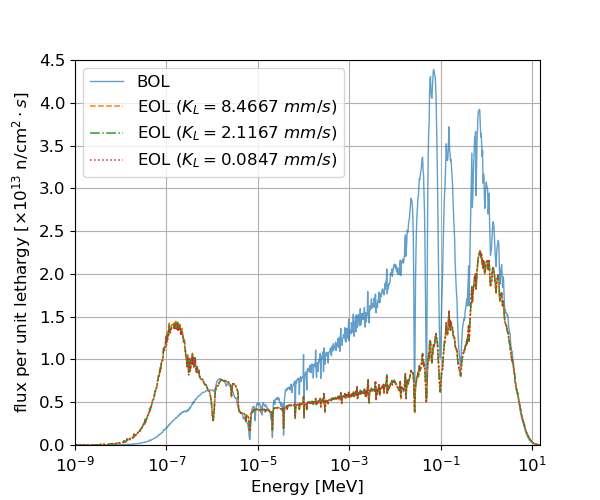

In [21]:
# Initialize figure
fig_1 = matplotlib.pyplot.figure(1, figsize=[6,5])
ax1 = fig_1.add_subplot(111)
ax1.grid(True)
ax1.set_xlabel('Energy [MeV]', fontsize=12)
ax1.set_ylabel(r'flux per unit lethargy [$\times 10^{13}$ n/cm$^2\cdot s$]', fontsize=12)
ax1.tick_params('y', labelsize=12)
ax1.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax1.tick_params('x', labelsize=12)
ax1.set_ylim(0,4.5)
ax1.set_xlim(1e-9,15)

#ax1.set_ylim(1,1.4)
#ax1.set_xlim(8e-8,3e-7)
#ax1.set_xlim(0.075,2.75e-1)

ax1.semilogx(energy, flux_bol, '-', label='BOL', linewidth=1.0, alpha=0.7)
ax1.semilogx(energy, flux_eol_100, '--', label=r'EOL ($K_L=8.4667$ $mm/s$)', linewidth=1.1, alpha=1, markerfacecolor="None")
ax1.semilogx(energy, flux_eol_25, '-.', label=r'EOL ($K_L=2.1167$ $mm/s$)', linewidth=1.1, alpha=1, markerfacecolor="None")
ax1.semilogx(energy, flux_eol_1, ':', label=r'EOL ($K_L=0.0847$ $mm/s$)', linewidth=1.1, alpha=1, markerfacecolor="None")
ax1.legend(loc=0, fontsize=12)

fig_1.show()
#fig_1.savefig('/home/andrei2/Desktop/git/publications/2020-rykhl-dissertation/dissertation/figures/ch4/eps/spectrum.png',bbox_inches='tight', dpi=700)

<IPython.core.display.Javascript object>


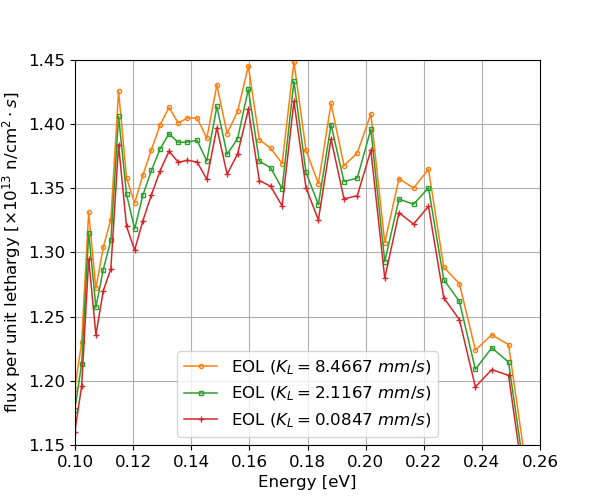

In [56]:
# Initialize figure
fig_2 = matplotlib.pyplot.figure(2, figsize=[6,5])
ax1 = fig_2.add_subplot(111)
ax1.grid(True)
ax1.set_xlabel('Energy [eV]', fontsize=12)
ax1.set_ylabel(r'flux per unit lethargy [$\times 10^{13}$ n/cm$^2\cdot s$]', fontsize=12)
ax1.tick_params('y', labelsize=12)
#ax1.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax1.tick_params('x', labelsize=12)
#ax1.set_ylim(0,4.5)
#ax1.set_xlim(2e-8,8)

ax1.set_ylim(1.15,1.45)
#ax1.set_xlim(8e-8,3e-7)
ax1.set_xlim(0.1,0.26)

ax1.set_prop_cycle(color=colors[1:])
#ax1.semilogx(energy, flux_bol, '-', label='BOL', linewidth=1.0, alpha=0.7)
ax1.plot(1e+6*energy, flux_eol_100,'o-', label=r'EOL ($K_L=8.4667$ $mm/s$)', linewidth=1.1, alpha=1, markerfacecolor="None", markersize=3)
ax1.plot(1e+6*energy, flux_eol_25, 's-', label=r'EOL ($K_L=2.1167$ $mm/s$)', linewidth=1.1, alpha=1, markerfacecolor="None", markersize=3)
ax1.plot(1e+6*energy, flux_eol_1,  '+-', label=r'EOL ($K_L=0.0847$ $mm/s$)', linewidth=1.1, alpha=1, markerfacecolor="None", markersize=4)
ax1.legend(loc=0, fontsize=12)

fig_2.show()
#fig_2.savefig('/home/andrei2/Desktop/git/publications/2020-rykhl-dissertation/dissertation/figures/ch4/eps/spectrum_th_zoomed.png',bbox_inches='tight', dpi=700)

In [ ]:
r_eol = pearsonr(flux_eol,ben_flux_eol[:-1])  
# Initialize figure
fig_2 = matplotlib.pyplot.figure(2, figsize=[6,5])
ax1 = fig_2.add_subplot(111)
ax1.grid(True)
ax1.set_xlabel('Energy [MeV]', fontsize=12)
ax1.set_ylabel(r'flux per unit lethargy [$\times 10^{13}$ n/cm$^2\cdot s$]', fontsize=12)
ax1.tick_params('y', labelsize=12)
ax1.tick_params('x', labelsize=12)
#ax1.set_ylim(0,4e+13)
ax1.set_xlim(1e-8,10)

ax1.semilogx(energy2, flux_eol, '-', label='EOL (current work)', 
           color='#ff8100', linewidth=1.1, alpha=0.7)

ax1.semilogx(ene_grid_eol, ben_flux_eol, '-', label='EOL (Betzler et al. 2017)', 
           color='blue', linewidth=1.1, alpha=0.6)

ax1.legend(loc=0, fontsize=12)

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
textstr = '$r=%.5f$' % r_eol[0]
ax1.text(0.028, 0.81, textstr, transform=ax1.transAxes, fontsize=12,
        verticalalignment='top', bbox=props)

fig_2.show()
#fig_2.savefig('/home/andrei2/Desktop/git/publications/2020-rykhl-dissertation/dissertation/figures/ch4/ben_spec_eol.png',bbox_inches='tight', dpi=900)
print ("Correlation between neutron Betzler and current work is "
           + str(r_eol) )
delta_eol = 100*abs(inte.trapz(flux_eol,energy2)-inte.trapz(ben_flux_eol,ene_grid_eol))/inte.trapz(ben_flux_eol,ene_grid_eol)
print('Relative difference in total flux between Betzler and current work %f %%' %delta_eol)